Problem statement: With the help of linear regression we are going to help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables. Using linear regression we can calculate the probability of one getting into the IVY league colleges by using the independent variables as predictors and using modelling.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from scipy import stats
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.gofplots import qqplot
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels.stats.api as sms

In [3]:
jamboree = pd.read_csv('C:/DSML/Jamboree - case study/Jamboree_Admission.csv')

In [4]:
jamboree.shape

(500, 9)

In [5]:
jamboree.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
jamboree.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

# Missing value detection

In [7]:
jamboree.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


# Statistical summary

In [8]:
jamboree.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [9]:
jamboree = jamboree.drop('Serial No.',axis=1)

In [10]:
jamboree.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


# Visual Analysis

# Univariate Analysis

<AxesSubplot:xlabel='Research', ylabel='Count'>

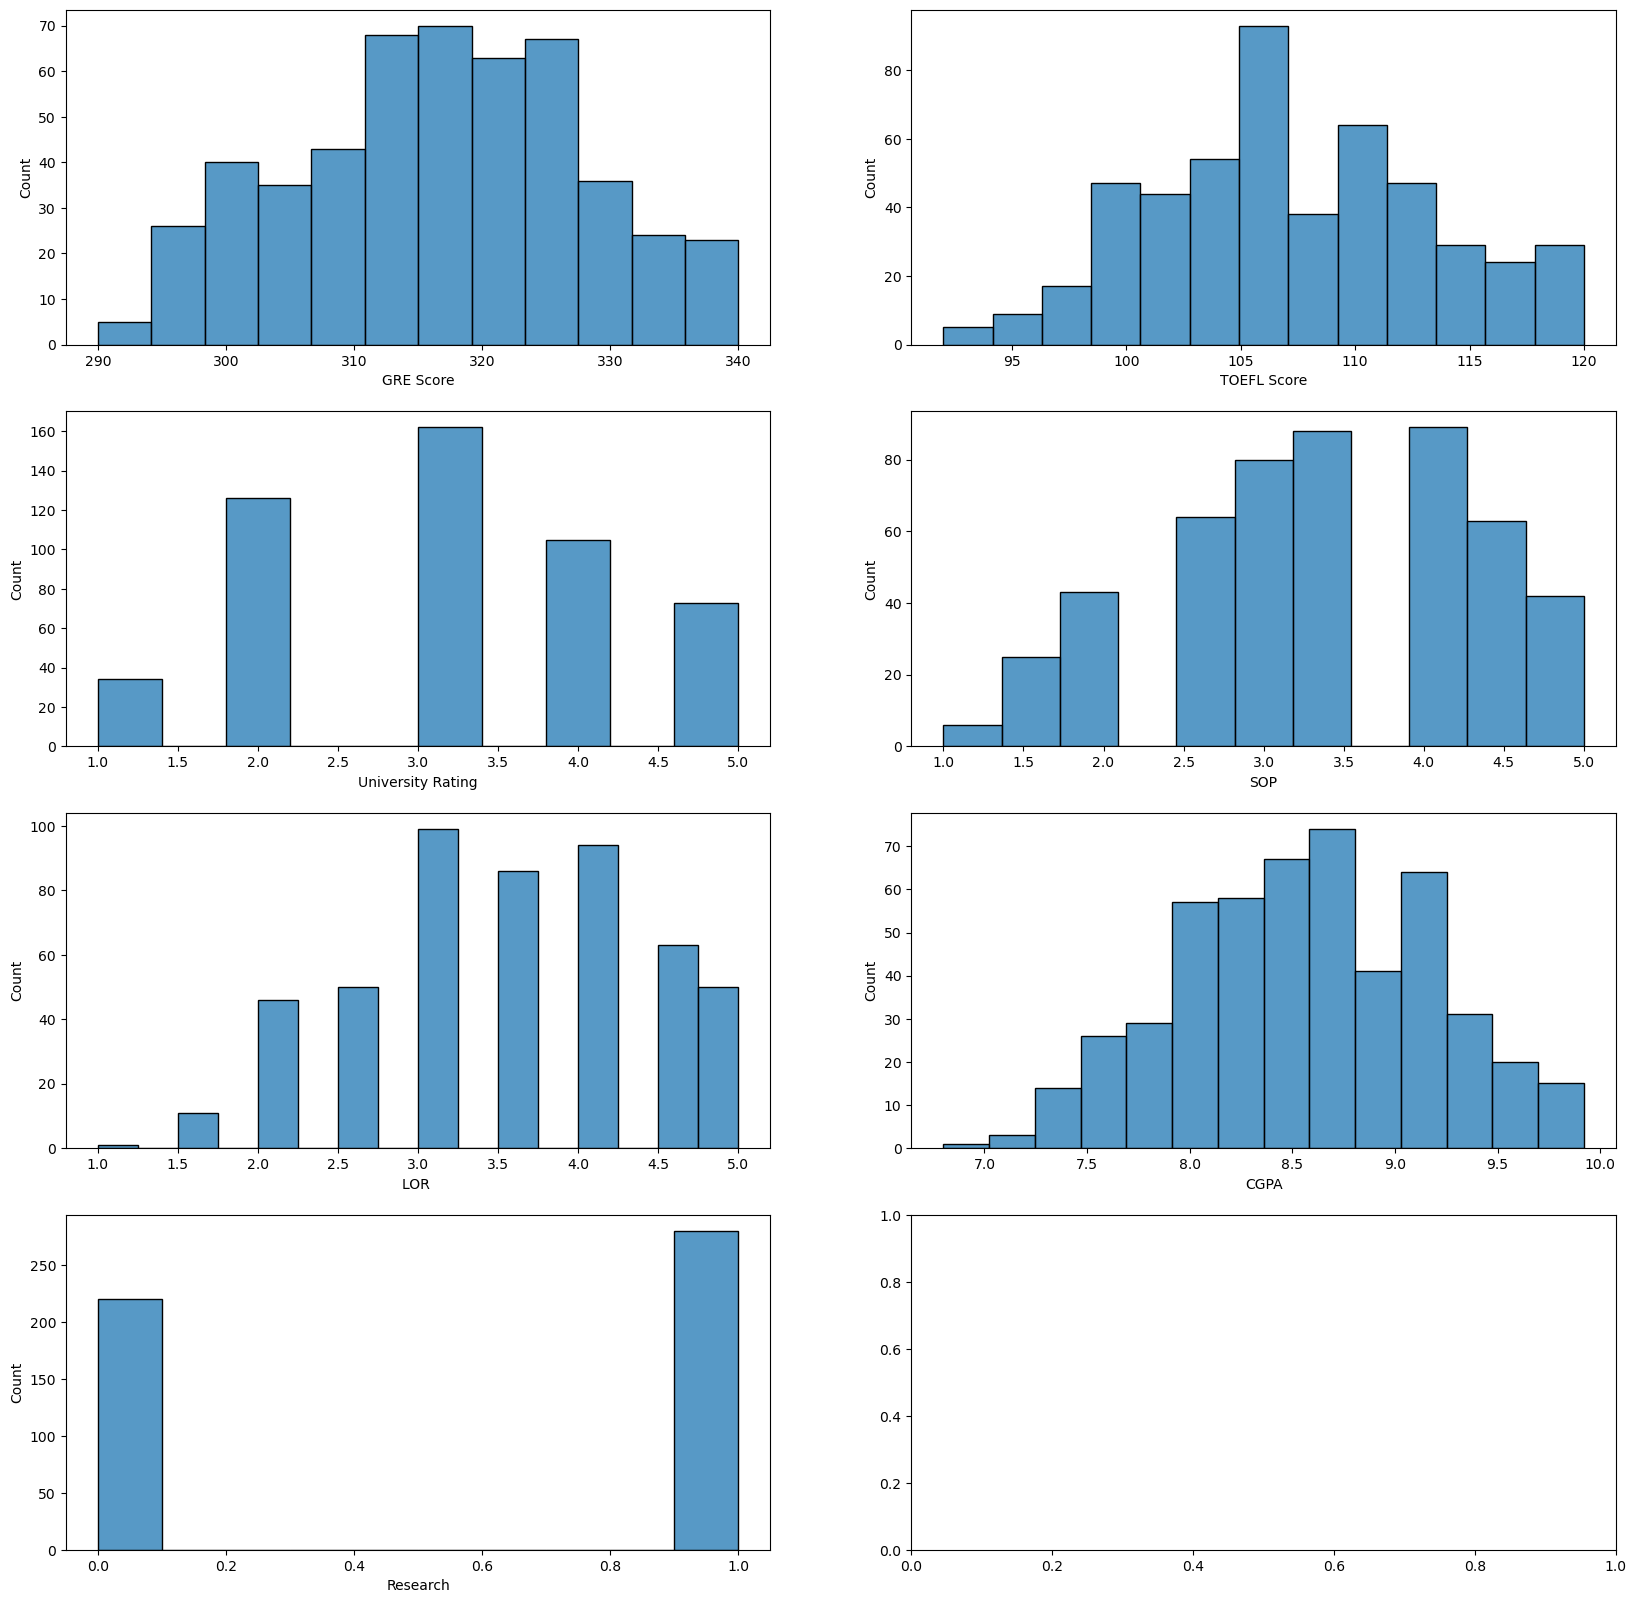

In [11]:
# Hist plot for continuous variables to visualize their distribution
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
sns.histplot(x = 'GRE Score',data = jamboree,ax=axis[0,0])
sns.histplot(x = 'TOEFL Score',data = jamboree,ax=axis[0,1])
sns.histplot(x = 'University Rating',data = jamboree,ax=axis[1,0])
sns.histplot(x = 'SOP',data = jamboree,ax=axis[1,1])
sns.histplot(x = 'LOR ',data = jamboree,ax=axis[2,0])
sns.histplot(x = 'CGPA',data = jamboree,ax=axis[2,1])
sns.histplot(x = 'Research',data = jamboree,ax=axis[3,0])

# Bivariate Analysis 

<AxesSubplot:xlabel='Research', ylabel='Chance of Admit '>

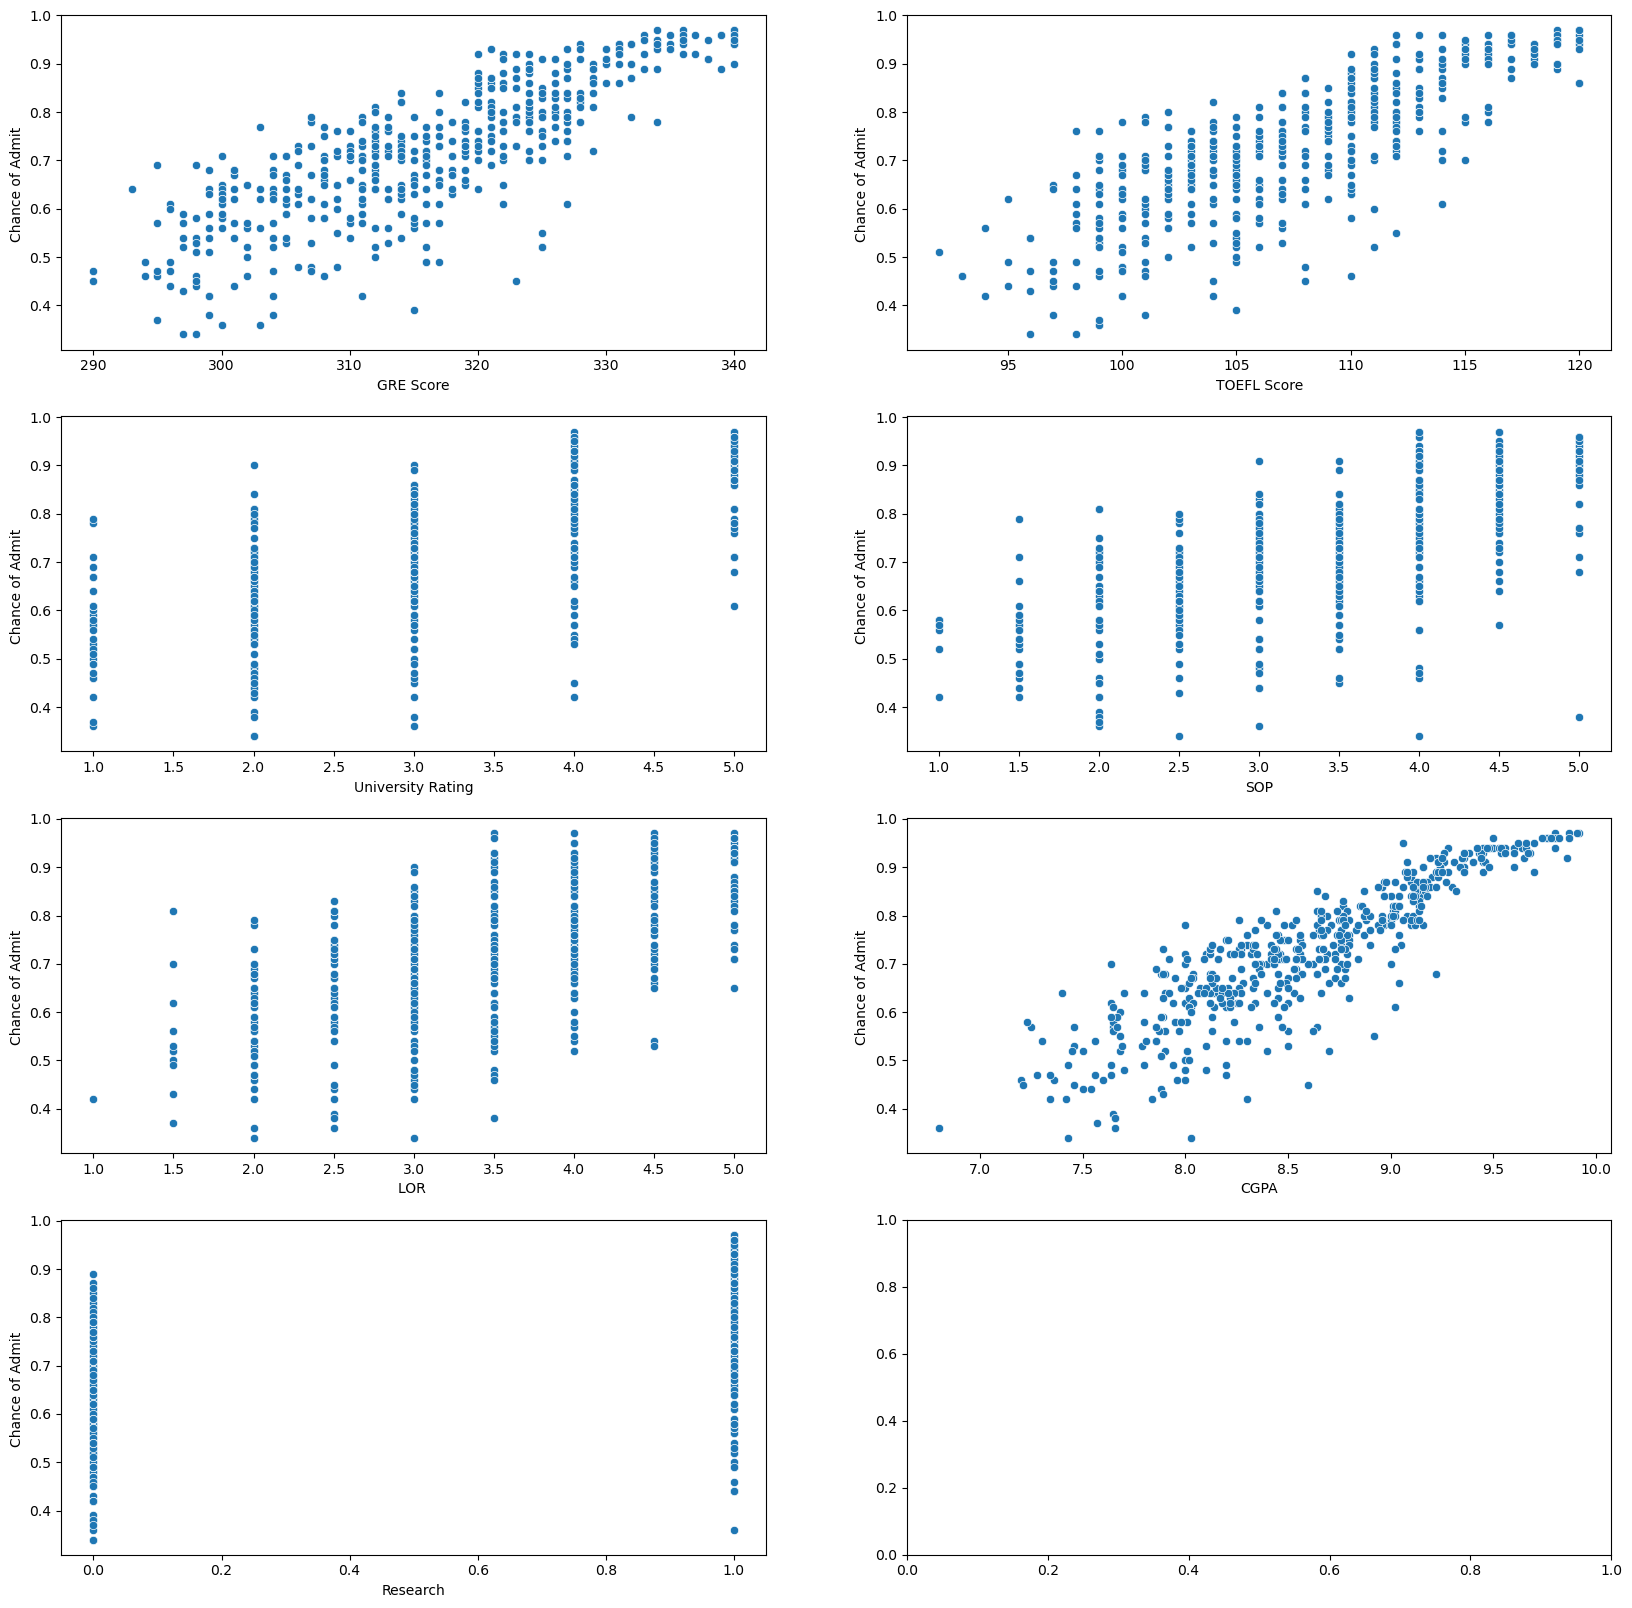

In [12]:
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
sns.scatterplot(x = 'GRE Score',y = 'Chance of Admit ',data = jamboree,ax=axis[0,0])
sns.scatterplot(x = 'TOEFL Score',y = 'Chance of Admit ',data = jamboree,ax=axis[0,1])
sns.scatterplot(x = 'University Rating',y = 'Chance of Admit ',data = jamboree,ax=axis[1,0])
sns.scatterplot(x = 'SOP',y = 'Chance of Admit ',data = jamboree,ax=axis[1,1])
sns.scatterplot(x = 'LOR ',y = 'Chance of Admit ',data = jamboree,ax=axis[2,0])
sns.scatterplot(x = 'CGPA',y = 'Chance of Admit ',data = jamboree,ax=axis[2,1])
sns.scatterplot(x = 'Research',y = 'Chance of Admit ',data = jamboree,ax=axis[3,0])

<AxesSubplot:ylabel='Research'>

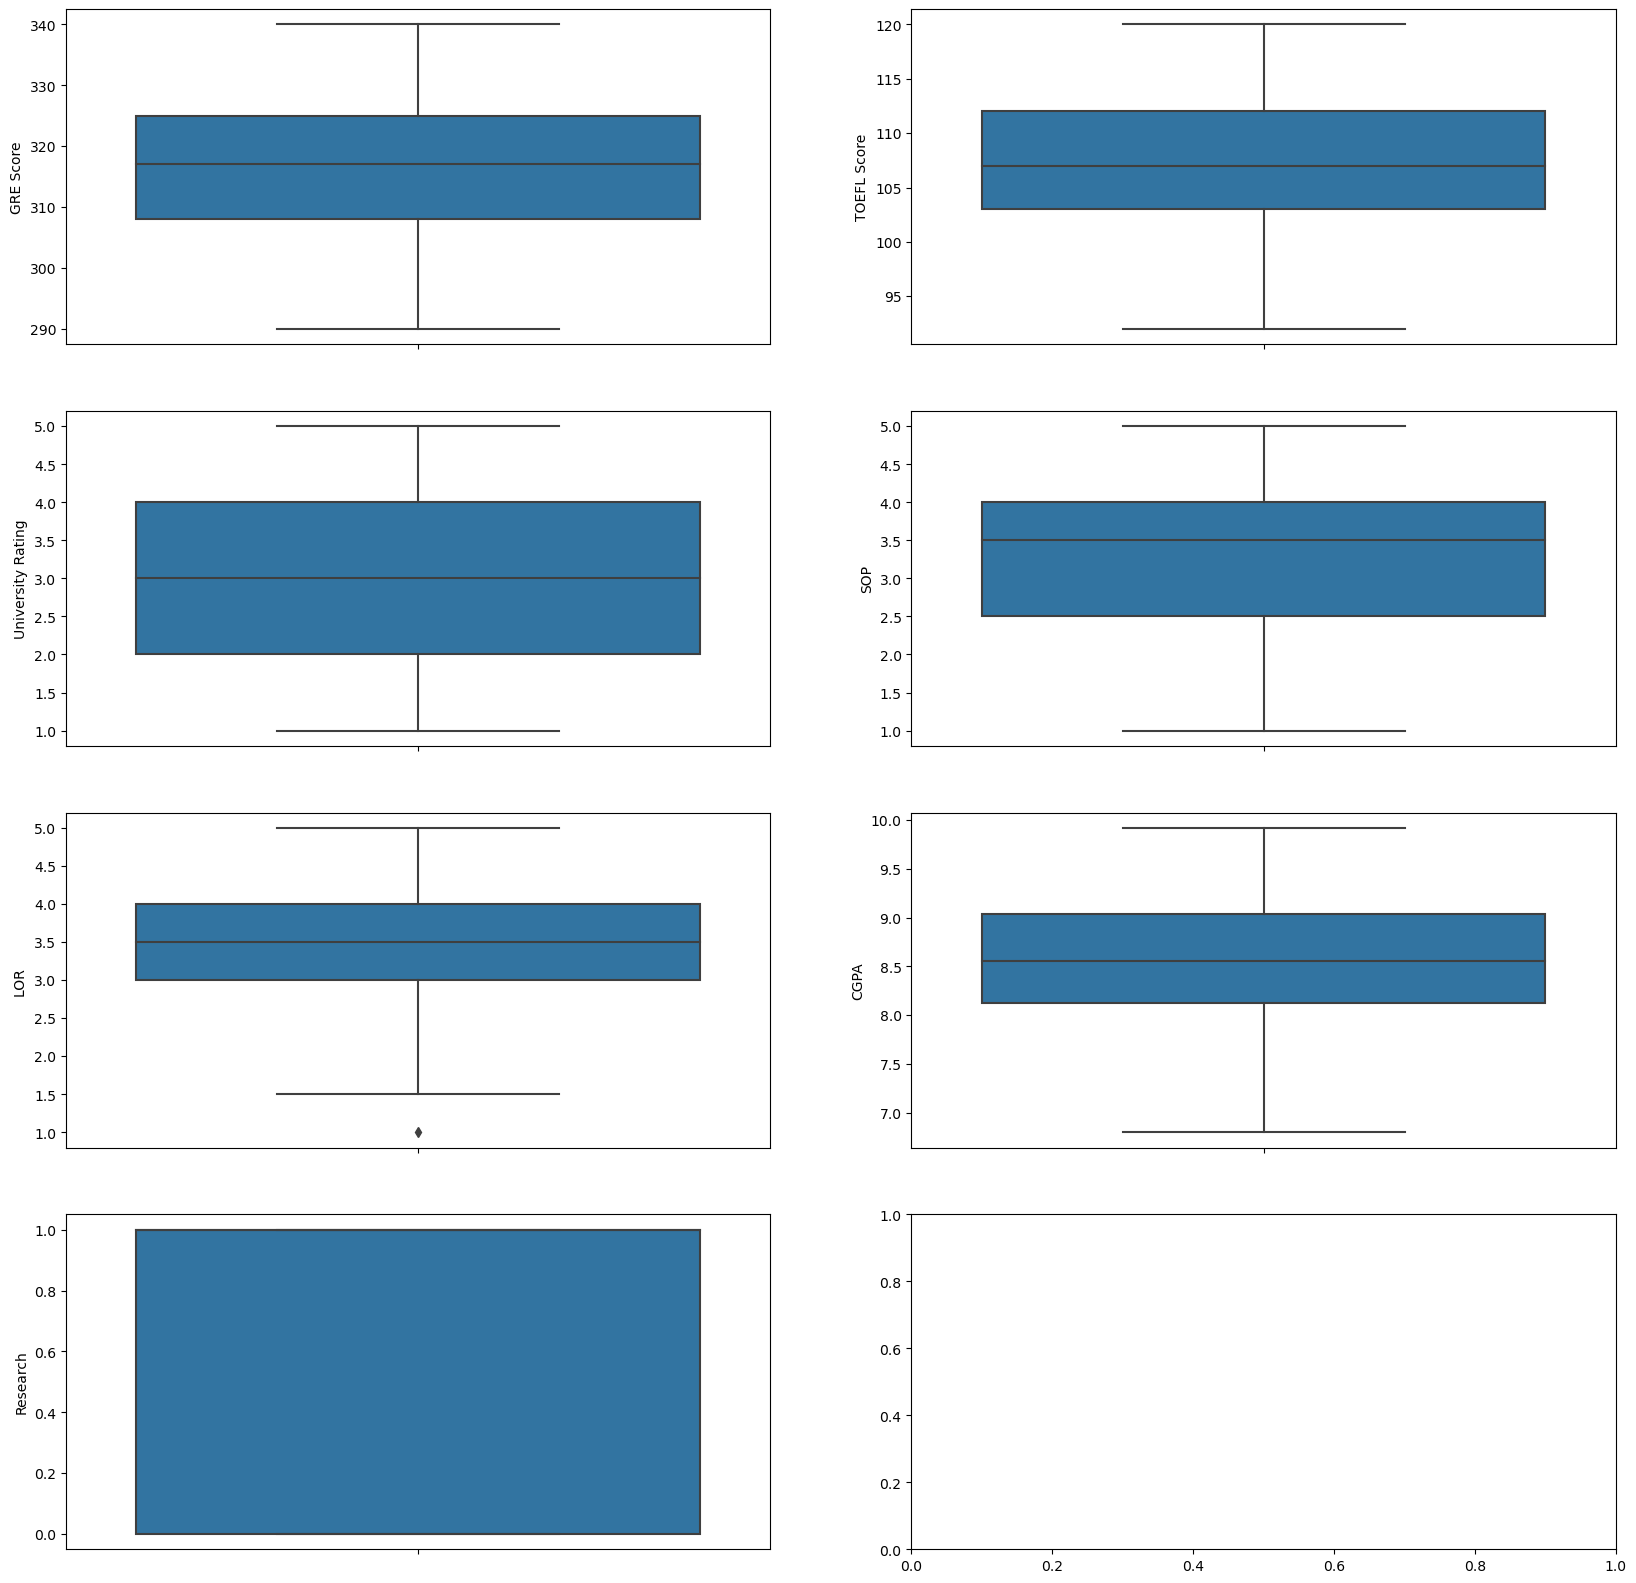

In [13]:
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
sns.boxplot(y = 'GRE Score',data = jamboree,ax=axis[0,0])
sns.boxplot(y = 'TOEFL Score',data = jamboree,ax=axis[0,1])
sns.boxplot(y = 'University Rating',data = jamboree,ax=axis[1,0])
sns.boxplot(y = 'SOP',data = jamboree,ax=axis[1,1])
sns.boxplot(y = 'LOR ',data = jamboree,ax=axis[2,0])
sns.boxplot(y = 'CGPA',data = jamboree,ax=axis[2,1])
sns.boxplot(y = 'Research',data = jamboree,ax=axis[3,0])

# Model building 

In [14]:
X = jamboree[jamboree.columns.drop('Chance of Admit ')]
Y = jamboree["Chance of Admit "]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, shuffle=False)

In [16]:
model = LinearRegression()
model.fit(x_train,y_train) 
Y_hat = model.predict(x_train)

In [17]:
model.intercept_

-1.2594324782480177

In [18]:
model.coef_

array([ 0.00173741,  0.00291958,  0.00571666, -0.00330517,  0.02235313,
        0.11893945,  0.02452511])

In [19]:
model.score(x_train,y_train)

0.8034713719824393

Linear Regression using statsmodel

In [20]:
import statsmodels.api as sm
X_sm = sm.add_constant(x_train) 

sm_model = sm.OLS(y_train, X_sm).fit()

In [21]:
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     228.9
Date:                Mon, 12 Jun 2023   Prob (F-statistic):          3.12e-134
Time:                        00:40:56   Log-Likelihood:                 537.37
No. Observations:                 400   AIC:                            -1059.
Df Residuals:                     392   BIC:                            -1027.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2594      0.12

# Testing the assumptions of the linear regression model

# Multicollinearity check by VIF score

In [22]:
# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [23]:
vif = pd.DataFrame()
X_t = x_train
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,GRE Score,1438.45
1,TOEFL Score,1349.75
5,CGPA,1080.49
4,LOR,38.41
3,SOP,38.05
2,University Rating,22.14
6,Research,2.86


In [24]:
X_new = x_train.drop(columns=['GRE Score'])

In [25]:
X2_sm = sm.add_constant(X_new)

sm_model = sm.OLS(y_train, X2_sm).fit()

In [26]:
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     260.8
Date:                Mon, 12 Jun 2023   Prob (F-statistic):          1.19e-133
Time:                        00:40:56   Log-Likelihood:                 533.11
No. Observations:                 400   AIC:                            -1052.
Df Residuals:                     393   BIC:                            -1024.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.9804      0.08

In [27]:
vif = pd.DataFrame()
X_t = X_new
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,CGPA,829.46
0,TOEFL Score,731.85
3,LOR,38.36
2,SOP,36.47
1,University Rating,20.27
5,Research,2.86


In [28]:
X_new1 = X_new.drop(columns=['CGPA'])

In [29]:
vif = pd.DataFrame()
X_t = X_new1
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,LOR,36.63
2,SOP,36.34
0,TOEFL Score,21.87
1,University Rating,20.07
4,Research,2.85


In [30]:
X2_sm = sm.add_constant(X_new1)  #Statmodels default is without intercept, to add intercept we need to add constant 

sm_model = sm.OLS(y_train, X2_sm).fit()

print(sm_model.summary())

# Check if the mean of residuals is nearly zero

In [31]:
X_sm = sm.add_constant(X_new) 

sm_model = sm.OLS(y_train, X_sm).fit()

In [32]:
sm_model.resid.mean()

-1.065161847613183e-14

# Linearity of variables

<AxesSubplot:xlabel='Research', ylabel='Chance of Admit '>

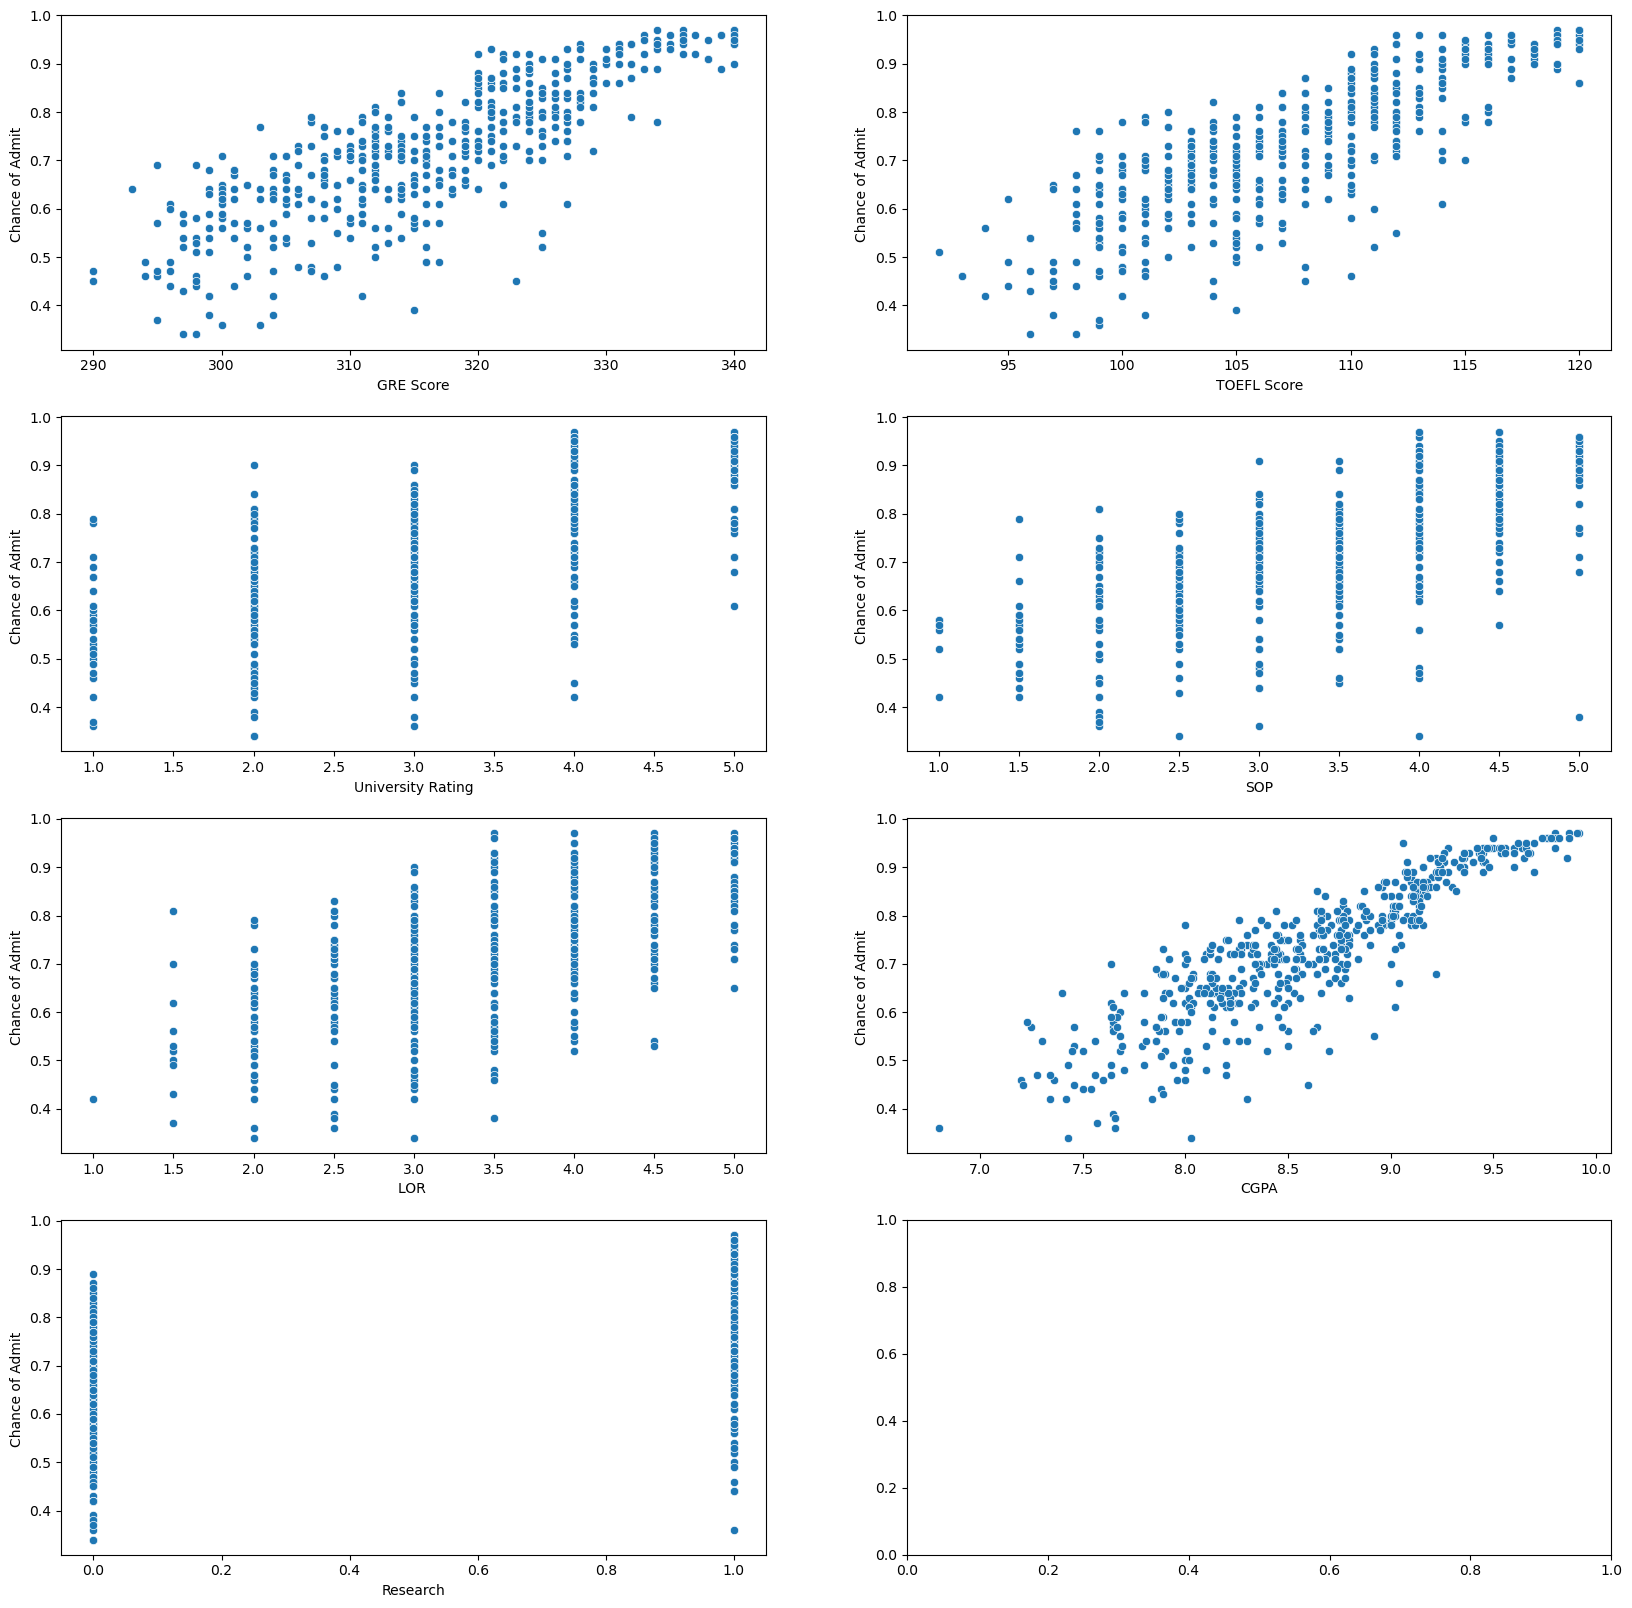

In [33]:
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
sns.scatterplot(x = 'GRE Score',y = 'Chance of Admit ',data = jamboree,ax=axis[0,0])
sns.scatterplot(x = 'TOEFL Score',y = 'Chance of Admit ',data = jamboree,ax=axis[0,1])
sns.scatterplot(x = 'University Rating',y = 'Chance of Admit ',data = jamboree,ax=axis[1,0])
sns.scatterplot(x = 'SOP',y = 'Chance of Admit ',data = jamboree,ax=axis[1,1])
sns.scatterplot(x = 'LOR ',y = 'Chance of Admit ',data = jamboree,ax=axis[2,0])
sns.scatterplot(x = 'CGPA',y = 'Chance of Admit ',data = jamboree,ax=axis[2,1])
sns.scatterplot(x = 'Research',y = 'Chance of Admit ',data = jamboree,ax=axis[3,0])

In [34]:
jamboree.corr()['Chance of Admit ']

GRE Score            0.810351
TOEFL Score          0.792228
University Rating    0.690132
SOP                  0.684137
LOR                  0.645365
CGPA                 0.882413
Research             0.545871
Chance of Admit      1.000000
Name: Chance of Admit , dtype: float64

# Test for Homoscedasticity(minimal to no heteroscadasticity)

In [35]:
predicted = sm_model.predict()
residuals = sm_model.resid

Breusch-Pagan test for homoscedasticity

In [36]:
 bp_test = pd.DataFrame(sms.het_breuschpagan(residuals, sm_model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

In [37]:
bp_test

,value
Lagrange multiplier statistic,28.461274
p-value,0.000077
f-value,5.017548
f p-value,0.000057


Regplot for visualization of homoscedasticity

<AxesSubplot:>

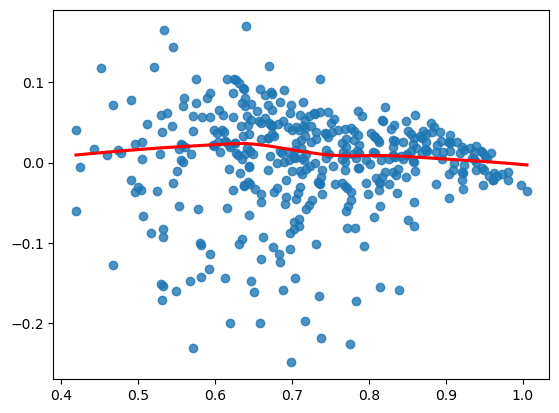

In [38]:
sns.regplot(x=predicted, y=residuals, lowess=True, line_kws={'color': 'red'})

# Normality of residuals

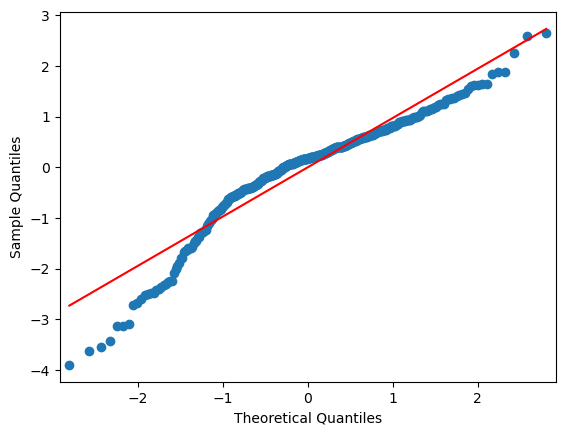

In [39]:
import statsmodels.api as sm
qqplot(residuals,stats.norm,fit=True,line='r')
plt.show()

# Model performance evaluation

# Mean Absolute Error(MAE)

In [40]:
error = mae(y_train, predicted)
error

0.046195490173396914

# Root Mean Squared Error(RMSE)

In [41]:
rmse = np.sqrt(mean_squared_error(y_train, predicted, squared = False))
rmse

0.2526228350601312

# R-squared and Adjusted R-squared

In [42]:
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance of Admit    R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     260.8
Date:                Mon, 12 Jun 2023   Prob (F-statistic):          1.19e-133
Time:                        00:40:58   Log-Likelihood:                 533.11
No. Observations:                 400   AIC:                            -1052.
Df Residuals:                     393   BIC:                            -1024.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.9804      0.080    -12.202      0.000      -1.138      -0.822
TOEFL Score           0.0044      0.001      4.443      0.000       0.002       0.006
University Rating     0.0064      0.005      1.331      0.184      -0.003       0.016
SOP                  -0.0045      0.006     -0.811      0.418      -0.016       0.006
LOR                   0.0222      0.006      3.961      0.000       0.011       0.033
CGPA                  0.1325      0.011     11.614      0.000       0.110       0.155
Research              0.0313      0.008      4.072      0.000       0.016       0.046
==============================================================================
Omnibus:                       79.400   Durbin-Watson:                   0.773
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.282
Skew:                          -1.103   Prob(JB):                     1.04e-32
Kurtosis:                       4.993   Cond. No.                     2.70e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Train and test performances are checked

In [43]:
model = LinearRegression().fit(x_train, y_train)
print("intercept w0 : ",model.intercept_)
print("co efficients : ",model.coef_)

intercept w0 :  -1.2594324782480177
co efficients :  [ 0.00173741  0.00291958  0.00571666 -0.00330517  0.02235313  0.11893945
  0.02452511]


In [44]:
ypred = model.predict(x_test)

In [45]:
# model score after training
model.score(x_train, y_train)

0.8034713719824393

In [46]:
# model score with test data
model.score(x_test, y_test)

0.898286909853386

# Comments on the performance measures

In [47]:
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance of Admit    R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     260.8
Date:                Mon, 12 Jun 2023   Prob (F-statistic):          1.19e-133
Time:                        00:40:58   Log-Likelihood:                 533.11
No. Observations:                 400   AIC:                            -1052.
Df Residuals:                     393   BIC:                            -1024.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.9804      0.080    -12.202      0.000      -1.138      -0.822
TOEFL Score           0.0044      0.001      4.443      0.000       0.002       0.006
University Rating     0.0064      0.005      1.331      0.184      -0.003       0.016
SOP                  -0.0045      0.006     -0.811      0.418      -0.016       0.006
LOR                   0.0222      0.006      3.961      0.000       0.011       0.033
CGPA                  0.1325      0.011     11.614      0.000       0.110       0.155
Research              0.0313      0.008      4.072      0.000       0.016       0.046
==============================================================================
Omnibus:                       79.400   Durbin-Watson:                   0.773
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.282
Skew:                          -1.103   Prob(JB):                     1.04e-32
Kurtosis:                       4.993   Cond. No.                     2.70e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""